In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)

CPU times: user 1.43 ms, sys: 0 ns, total: 1.43 ms
Wall time: 1.44 ms


In [ ]:
df=pd.read_csv('/content/sample_data/Bengali_Banglish_80K_Dataset.csv')
df

,Bengali,Label,Banglish
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,ekhane kaoke kobor diyo na tahole tomader pori...
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,kinto voy kiser theke ami jantamna kinto amar ...
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,kronavairas theke srishto rog covid 19 bishbob...
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,citao tar dike egote sahosh pacche na dudiner ...
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,rani meri tiudrer pretatma etaaj ceshta korlam...
...,...,...,...
80093,কী ম্যাচিউর একটা কাজ! আশফাক নিপুনরা আছে বলেই এ...,disgust,ki mjaciur ekta kaj! ashfak nipunra ache bolei...
80094,সত্যটা কি সেটা আসলে জান্তে পারলাম না । আর পুরা...,surprise,sotjta ki sheta asle jante parlam na . ar pura...
80095,এভাবেই পুরুষেরা পার পেয়ে যায়।কিন্তু তাদের চোখে...,surprise,evabei purushera paro peye jay.kintu tader cok...
80096,যদিও আফরান নিশু বস আছে বসের নাটক বাদ দেয় না তা...,disgust,jdio afran nishu bos ache boser natok bad dey ...


In [ ]:
df.drop('Bengali', axis=1, inplace=True)
df['classes']=df['Label']

In [ ]:
label_map = {
    'fear': 0,
    'sadness': 1,
    'surprise': 2,
    'disgust': 3,
    'anger': 4,
    'joy': 5
}

In [ ]:
df['Label'] = df['classes'].map(label_map)

In [ ]:
!pip install emoji
import emoji

def remove_emoji(text):
    # Ensure the input is a string before passing to emoji.replace_emoji
    return emoji.replace_emoji(str(text), replace='')  # replaces all emojis with empty string

# Apply the function after ensuring the column is treated as strings
df['Banglish'] = df['Banglish'].astype(str).apply(remove_emoji)

In [ ]:
def remove_duplicate(dataframe, column_name):
    final_df = dataframe.drop_duplicates(subset=column_name)
    return final_df
df=remove_duplicate(df,'Banglish')

In [ ]:
def rem_special_characters(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)
df['Bengali'] = df['Banglish'].apply(remove_emoji)





/tmp/ipython-input-8-3397399544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bengali'] = df['Banglish'].apply(remove_emoji)


In [ ]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'(?:https?:\/\/|www\.|:\/\/)[^\s]+', re.IGNORECASE)
    return url_pattern.sub('', text)

# Apply to your DataFrame column
df['Banglish'] = df['Banglish'].astype(str).apply(remove_emoji)

/tmp/ipython-input-9-2638120055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Banglish'] = df['Banglish'].astype(str).apply(remove_emoji)


In [ ]:
df_train, df_temp = train_test_split(df, test_size=0.5, random_state=42, shuffle=True)

In [ ]:
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, shuffle=True)

In [ ]:
df_train['Banglish'].count()

np.int64(39573)

In [ ]:
df_train['Banglish'].nunique()
df_train['classes'].count()
df_train['Label'].count()
df_train['Label']


,Label
57451,1
79677,4
14324,1
2940,4
75531,4
...,...
6289,5
55800,1
77771,3
860,0


In [ ]:
train_data = df_train.Bengali.tolist()
train_label = df_train.Label.tolist()
train_data


['pach bochrer somporko taeg kore amar khub kacher valobasar priy jon manush amake chere choley geche khub koshte achi tai ei ganta shune bar bar chere jeo na',
 'gutikyek broylar murgi projonmer ei koyek ta bokacodar motamot deshe pura projonmer 1% o na. khamakha ei ordho shikkhito murgi projonmo ke proshno kore ki emon lav.',
 'besh borosor dhakkai kheyeche Bangladesh coturtho diner prothom ovarei aut hoye firey gechen odhinayok muminul hok',
 'salar sangbadik',
 'Bangladesh ek odvut desh, sobkichu sombhob ei deshe. hoyto dekha jabe kon ek ojana karne mritjudondoprapto asamio beksur khalas peye jete pare.',
 'emes mjari mjak tar ceshta dekhe mone hocche tar stan onuman kore',
 'shudhu shudhu hospital le rakhche takar jonjo esob hospitaler doktor shudhu taka taka cine shala madarcoder baccara khubi kharap okhane valo manush ache valo manush kharap pagler sathe thakle to pagol hobe',
 'shudhui alemder jamin nei tai na',
 'hasbe etai sbavabik, ora tto ar sosta nesha (gaja,djandi) khai n

In [ ]:
valid_data = df_valid.Bengali.tolist()
valid_label = df_valid.Label.tolist()
test_data = df_test.Bengali.tolist()
test_label = df_test.Label.tolist()

In [ ]:
%%time
lr_model = LogisticRegressionCV(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
svm_model = SVC(class_weight='balanced')
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'SVM', 'KNN', 'AdaBoost']
ml_models = [lr_model,dt_model,rf_model,mnb_model, svm_model, knn_model, ada_model]

CPU times: user 192 µs, sys: 0 ns, total: 192 µs
Wall time: 198 µs


In [ ]:
%%time
def model_train(model, train_data, train_labels):
  pipe = Pipeline([
        ('FE', TfidfVectorizer(ngram_range=(1,2), use_idf = True, tokenizer=lambda x: x.split(), max_features=20000)),
        ('Transformer', TfidfTransformer()),
        ('M', model)
    ])
  pipe.fit(train_data, train_labels)
  return pipe

trained_ml_models = []
for i in ml_models:
    tt = model_train(i,train_data, train_label)
    trained_ml_models.append(tt)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extr

CPU times: user 38min 42s, sys: 4.63 s, total: 38min 46s
Wall time: 36min 49s


In [ ]:

pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y
    # print(confusion_matrix(true,pred))
    # print(classification_report(true,pred))
    # print("\nPrecison : ",precision_score(pred,true, average = 'weighted'))
    # print("\nRecall : ",recall_score(pred,true,  average = 'weighted'))
    # print("\nF1 : ",f1_score(pred,true,  average = 'weighted'))

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100))
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, valid_data, valid_label, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)
performance_matrix


,Precision,Recall,F1 Score
Logistic Regression,57.60,57.17,57.13
Decision Tree,41.21,41.00,41.05
Random Forest,54.37,53.18,53.16
Naive Bayes,58.70,56.10,56.27
SVM,59.66,57.97,58.44
KNN,28.04,26.81,23.59
AdaBoost,36.39,31.22,24.02


from matplotlib import pyplot as plt
_df_0['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Precision', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Recall', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='F1 Score', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

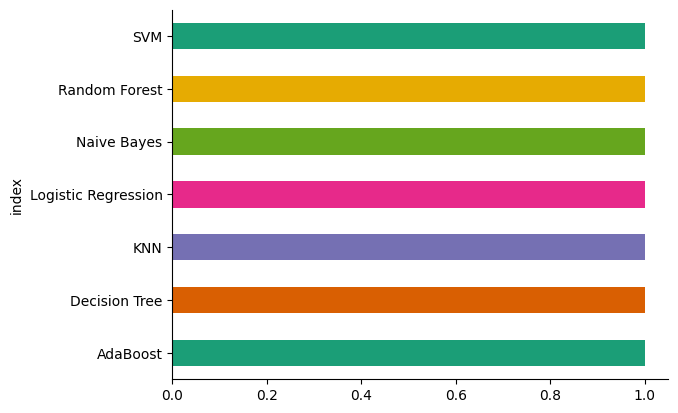

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)